In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as matim
import ipywidgets as widgets

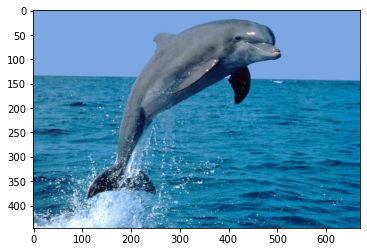

In [3]:
img = matim.imread('./images/dolphin.jpg')
plt.imshow(img)

In [6]:
@widgets.interact_manual(s=(0,200,1),r=(0,1,0.1))
def edgePreserve(s=50,r=0.5):
    edgImage = cv2.edgePreservingFilter(img,sigma_s=s,sigma_r=r)
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1) #original image
    plt.imshow(img)
    plt.subplot(1,2,2) #filtered image
    plt.imshow(edgImage)
    plt.show()

interactive(children=(IntSlider(value=50, description='s', max=200), FloatSlider(value=0.5, description='r', m…

***Detail Enhance***

In [10]:
@widgets.interact(s=(0,200,1),r=(0,1,0.1))
def detail(s=20,r=0.5):
    detailImg = cv2.detailEnhance(img,sigma_s=s,sigma_r=r)
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1) #original image
    plt.imshow(img)
    plt.title("Orrigibal Image")
    plt.subplot(1,2,2) #filtered image
    plt.imshow(detailImg)
    plt.title("Detail Enhance")
    plt.show()

interactive(children=(IntSlider(value=20, description='s', max=200), FloatSlider(value=0.5, description='r', m…

In [21]:
def adjust_gamma(img,gamma=1):
    invGamma = 1.0/gamma
    table = np.array([((i/255)**invGamma)*255 for i in np.arange(0,256)])
    lut_img = cv2.LUT(img.astype(np.uint8),table.astype(np.uint8))
    return lut_img

In [22]:
path = "./images/dolphin.jpg"
img = matim.imread(path)

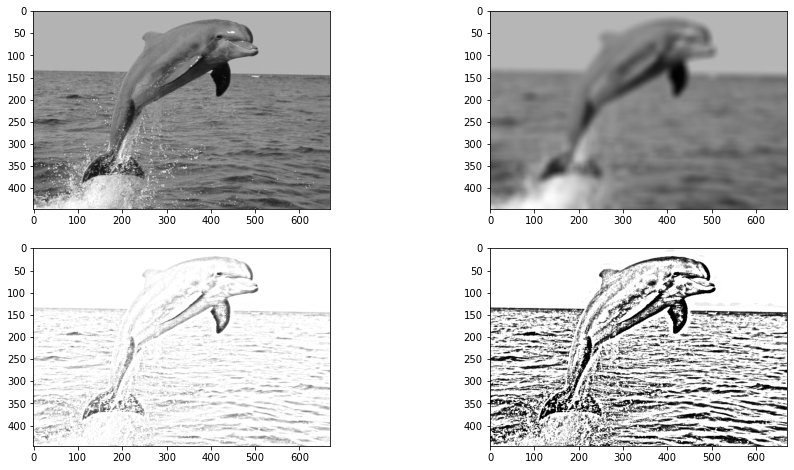

In [23]:
ksize=21
sigmaX=9
gamma=0.1
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray,(ksize,ksize),sigmaX)
gray_blur_divide = cv2.divide(gray,gray_blur,scale = 256)
pencil_sketch = adjust_gamma(gray_blur_divide,gamma)


plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(gray_blur,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(gray_blur_divide,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(pencil_sketch,cmap='gray')

In [26]:
@widgets.interact_manual(ksize =(3,25,2),sigmaX=(1,13,2),gamma =(0,1,0.01))
def pencil_art_image(ksize=21,sigmaX=9,gamma=0.1):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray,(ksize,ksize),sigmaX)
    gray_blur_divide = cv2.divide(gray,gray_blur,scale = 256)
    pencil_sketch = adjust_gamma(gray_blur_divide,gamma)
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1) #original image
    plt.imshow(img)
    plt.title("Original Image")
    plt.subplot(1,2,2) #filtered image
    plt.imshow(pencil_sketch,cmap='gray')
    plt.title("Pencil Sketch")
    plt.show()


interactive(children=(IntSlider(value=21, description='ksize', max=25, min=3, step=2), IntSlider(value=9, desc…

In [27]:
img = matim.imread('./images/dolphin.jpg')

In [28]:
def edge_mask(img,ksize,block_size):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_median = cv2.medianBlur(gray,ksize)
    edges = cv2.adaptiveThreshold(gray_median,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,block_size,ksize)
    return edges

In [29]:
edge_img = edge_mask(img,7,5)

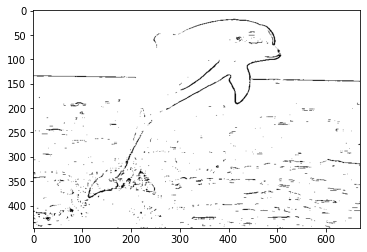

In [30]:
plt.imshow(edge_img,cmap='gray')

### K Means Clustering

In [31]:
def kmeans_cluster(img,k):
    data = np.float32(img).reshape((-1,3))
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    ret,label,center = cv2.kmeans(data,k,None,criteria,5,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result= result.reshape(img.shape)
    return result

In [32]:
cluster_img = kmeans_cluster(img,6)

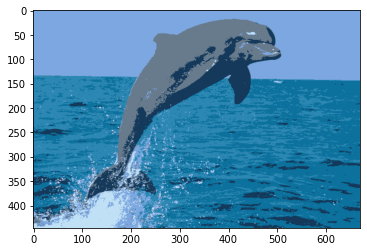

In [33]:
plt.imshow(cluster_img)

In [34]:
d=7
sigmacolor=200
sigmaspace=200
bilateral = cv2.bilateralFilter(cluster_img,d=d,sigmaColor=sigmacolor,sigmaSpace = sigmaspace)
cartoon = cv2.bitwise_and(bilateral,bilateral,mask = edge_img)

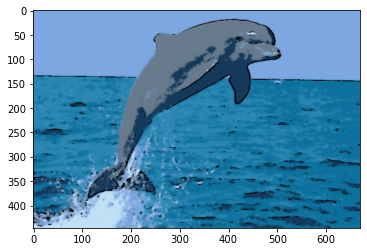

In [35]:
plt.imshow(cartoon)